In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 전처리 및 Exploratory Data Analysis (EDA)

In [3]:
data = pd.read_excel("./AI_ART_data.xlsx")
# Data cleaning
for col in ["price_USD", "num_item_review"]:
    data[col] = pd.to_numeric(data[col].str.replace(",", ""), errors="coerce")
data["num_item_review"] = data["num_item_review"].fillna(0).astype(int)
data.head()

,image_name,price_USD,star_seller,hue,saturation,value,artwork_sentiment,object_complexity,color_complexity,artwork_quality,...,adult_content_score,aesthetic_score,printable,customizable,main_object,categorized_main_object,theme_of_artwork,materials_of_artwork,stars,num_item_review
0,1.png,28.99,1,warm,37.6771,44.4522,-0.120000,0.178725,7.555649,24.887681,...,0.000116,6.1964,0,1,dog,animal,portrait painting,oil painting,4.9482,2418
1,3.png,14.95,1,cool,33.9589,40.6787,-0.080000,0.636024,7.588228,22.624991,...,0.000171,6.7197,1,0,demon,imaginary character,concept art,digital painting,5.0000,74
2,4.png,88.54,1,cool,31.9000,34.3151,0.000000,0.739586,6.673375,14.836169,...,0.000384,6.4601,0,1,monster,imaginary character,concept art,digital painting,4.9400,15
3,5.png,88.54,1,warm,25.7549,52.9358,-0.340000,0.775734,6.243066,13.462426,...,0.000122,6.1475,0,1,orc,imaginary character,concept art,digital painting,4.9400,15
4,6.png,88.54,1,warm,46.0011,25.6071,-0.113333,0.881556,7.255502,17.397088,...,0.000133,7.3184,0,1,man,human,portrait painting,digital painting,4.9400,15


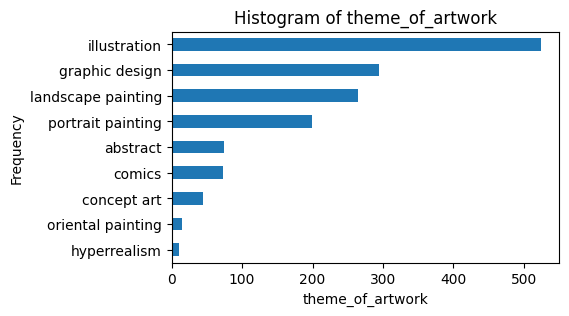

In [4]:
# Categorical Attribute 분포 확인
# column을 바꿔가면서 확인 가능
categorical_column = (
    # "star_seller"
    # "hue"
    # "categorized_main_object"
    "theme_of_artwork"
    # "materials_of_artwork"
    # "printable"
    # "customizable"
)

value_counts = data[categorical_column].value_counts().sort_values(ascending=True)

plt.figure(figsize=(5, 3))
value_counts.plot(kind="barh")  # for horizontal bar chart
# value_counts.plot(kind="bar")  # for vertical bar chart
plt.title(f"Histogram of {categorical_column}")
plt.xlabel(categorical_column)
plt.ylabel("Frequency")
plt.xticks(rotation=0)
# plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees (for vertical bar chart)
plt.show()

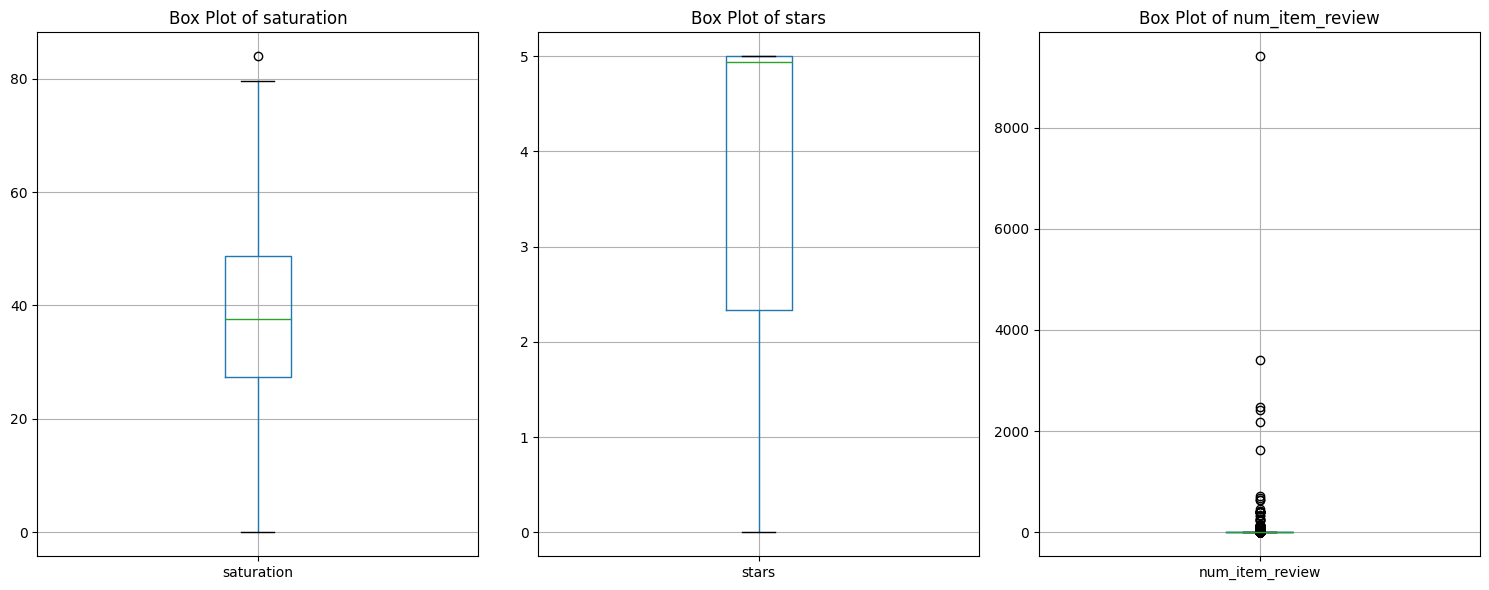

In [5]:
# numerical attribute 분포 확인
# column을 바꿔가면서 확인 가능 - 동시에 여러 column 확인 가능
numerical_columns = [
    # "price_USD",
    "saturation",
    # "value",
    # "artwork_sentiment",
    # "object_complexity",
    # "color_complexity",
    # "artwork_quality",
    # "image_text_similarity",
    # "adult_content_score",
    # "aesthetic_score",
    "stars",
    "num_item_review",
]
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 6))

for ax, column in zip(axes, numerical_columns):
    data.boxplot(column=column, ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

In [6]:
# Numerical Attribute 데이터 요약
data.describe()

,price_USD,star_seller,saturation,value,artwork_sentiment,object_complexity,color_complexity,artwork_quality,image_text_similarity,adult_content_score,aesthetic_score,printable,customizable,stars,num_item_review
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,59.826491,0.149433,38.189395,53.159095,0.003480,0.293363,6.997211,26.860063,0.074281,0.017942,6.344348,0.546364,0.228152,3.659193,24.235490
std,1408.652329,0.356634,15.325173,10.090405,0.123822,0.383794,1.044002,18.649407,0.125223,0.122709,0.501147,0.498012,0.419781,2.116399,286.820834
min,0.110000,0.000000,0.000000,21.153300,-0.390000,0.000000,2.230305,-14.186621,0.002328,0.000105,3.386600,0.000000,0.000000,0.000000,0.000000
25%,3.730000,0.000000,27.357000,46.257300,-0.080000,0.000000,6.497416,13.523585,0.006592,0.000136,6.070500,0.000000,0.000000,2.333300,0.000000
50%,6.570000,0.000000,37.540200,52.837100,0.000000,0.032504,7.168848,24.477820,0.014143,0.000162,6.381600,1.000000,0.000000,4.939400,0.000000
75%,15.070000,0.000000,48.764850,59.821200,0.070000,0.645989,7.676955,37.954992,0.087822,0.000229,6.676850,1.000000,0.000000,5.000000,0.000000
max,54450.000000,1.000000,83.970900,91.182200,0.433333,1.885770,9.238472,155.845000,0.935296,0.999895,7.641500,1.000000,1.000000,5.000000,9411.000000


# 모델 평가

In [7]:
import model_comparison as mc

In [8]:
_data = mc.preprocess_data()

F1, f1_features = mc.prepare_data(_data, feature_type="F1")
F2, f2_features = mc.prepare_data(_data, feature_type="F2")

DV1, DV2 = _data["stars"].values, _data["num_item_review"].values

print("Features in F1:", f1_features)
print("Features in F2:", f2_features)
print("Shape of F1:", F1.shape)
print("Shape of F2:", F2.shape)
print("Features added in F2:", set(f2_features) - set(f1_features))

Features in F1: ['saturation', 'value', 'color_complexity', 'artwork_quality', 'object_complexity', 'price_USD', 'star_seller', 'printable', 'customizable', 'hue_cool', 'hue_warm', 'categorized_main_object_animal', 'categorized_main_object_food', 'categorized_main_object_human', 'categorized_main_object_imaginary character', 'categorized_main_object_imaginary scenery', 'categorized_main_object_insect', 'categorized_main_object_none', 'categorized_main_object_plant', 'categorized_main_object_realistic scenery', 'categorized_main_object_thing', 'categorized_main_object_기타', 'theme_of_artwork_abstract', 'theme_of_artwork_comics', 'theme_of_artwork_concept art', 'theme_of_artwork_graphic design', 'theme_of_artwork_hyperrealism', 'theme_of_artwork_illustration', 'theme_of_artwork_landscape painting', 'theme_of_artwork_oriental painting', 'theme_of_artwork_portrait painting', 'materials_of_artwork_acrylic painting', 'materials_of_artwork_color pencil painting', 'materials_of_artwork_digital 

In [9]:
result_f1_dv1 = mc.compare_models(F1, DV1)
result_f2_dv1 = mc.compare_models(F2, DV1)
result_f1_dv2 = mc.compare_models(F1, DV2)
result_f2_dv2 = mc.compare_models(F2, DV2)

## 데이터셋과 종속 변수의 조합 별 결과 확인

In [10]:
results = pd.DataFrame(
    {
        "F1_DV1_score": result_f1_dv1,
        "F1_DV2_score": result_f1_dv2,
        "F2_DV1_score": result_f2_dv1,
        "F2_DV2_score": result_f2_dv2,
    },
    index=["Lasso", "KNN", "RandomForest", "FastforwardNN", "SVR"],
)
results

,F1_DV1_score,F1_DV2_score,F2_DV1_score,F2_DV2_score
Lasso,1.829206,66.517442,1.829206,69.535682
KNN,1.745268,33.123728,1.760527,33.795979
RandomForest,1.520505,44.709405,1.565061,49.077977
FastforwardNN,1.503403,26.828869,1.563997,28.213422
SVR,1.404262,24.280186,1.404014,24.298317


### 조합 별 모델에 따른 결과(Mean Absolute Error, MAE) 시각화 

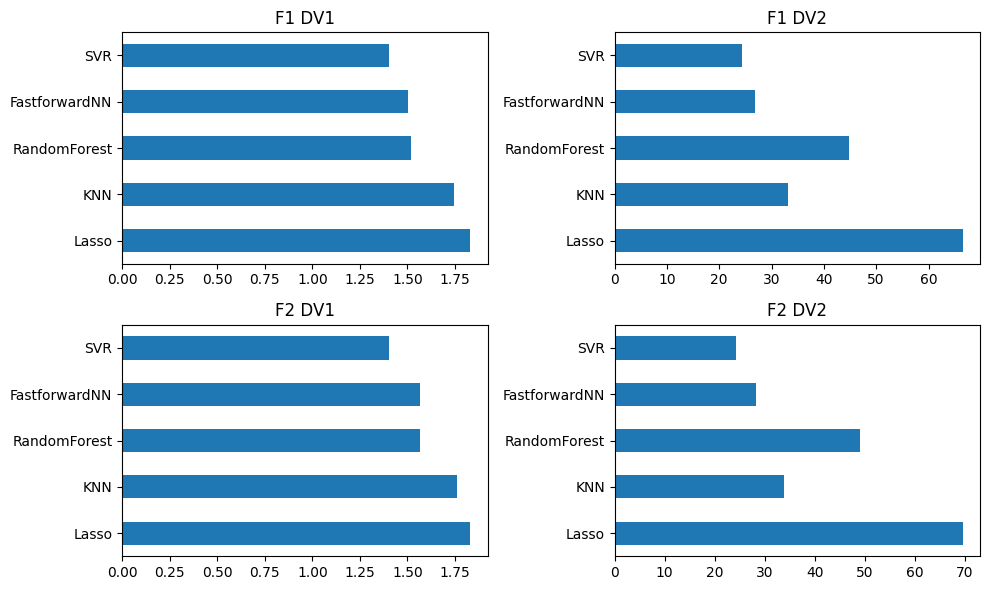

In [11]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
results["F1_DV1_score"].plot(kind="barh", title="F1 DV1")
plt.subplot(2, 2, 2)
results["F1_DV2_score"].plot(kind="barh", title="F1 DV2")
plt.subplot(2, 2, 3)
results["F2_DV1_score"].plot(kind="barh", title="F2 DV1")
plt.subplot(2, 2, 4)
results["F2_DV2_score"].plot(kind="barh", title="F2 DV2")
plt.tight_layout()
plt.show()

# 결과 분석
 - SVR 모델 분석 (최적의 모델)
 - Random Forest 모델 분석 (해석이 용이한 모델)

In [33]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import shap

### SVR 결과 분석

In [12]:
# import shap

# # 모델 학습
# svr = SVR(kernel="rbf")
# svr.fit(F1, DV1)

# # F1_background = shap.kmeans(F1, 30)


# # def svr_predict(data):
# #     return svr.predict(data)


# # SHAP 값 계산
# explainer = shap.KernelExplainer(svr.predict, F1)
# shap_values = explainer(F1)

### Random Forest 결과 분석
- 관찰하고자 하는 조합(현재 Dataset: F1, Dependent Variable: DV1)을 fit에 입력하여 결과 분석

In [34]:
# 모델 학습
rf = RandomForestRegressor(random_state=42, criterion="absolute_error")
rf.fit(F1, DV1)
# rf.fit(F1, DV2)

RandomForestRegressor(criterion='absolute_error', random_state=42)

### SHAP을 통한 Random Forest 결과 분석
SHAP이란 (https://christophm.github.io/interpretable-ml-book/shap.html)

In [53]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(F1)

**아래 시각화 설명**

**SHAP Bar Plot**
- SHAP Bar Plot은 각 특성(feature)이 모델 예측에 미치는 평균 영향을 보여줌
- 모델의 예측에 가장 중요한 특성이 무엇인지 시각적으로 나타냄



**X 축: SHAP 값**
- X축은 SHAP 값의 절대값의 평균을 나타내고 이는 각 특성이 모델 예측에 미치는 평균적인 영향을 의미
- 값이 클수록 해당 특성이 모델 예측에 중요한 역할을 함을 나타냄

**Y 축: 특성**
- 각 특성의 이름이 나열되어 있으며 상위 특성들은 모델 예측에 더 큰 영향을 미치는 특성임

**해석 예시**
- 가장 큰 영향을 미치는 특성은 price_USD 이다.

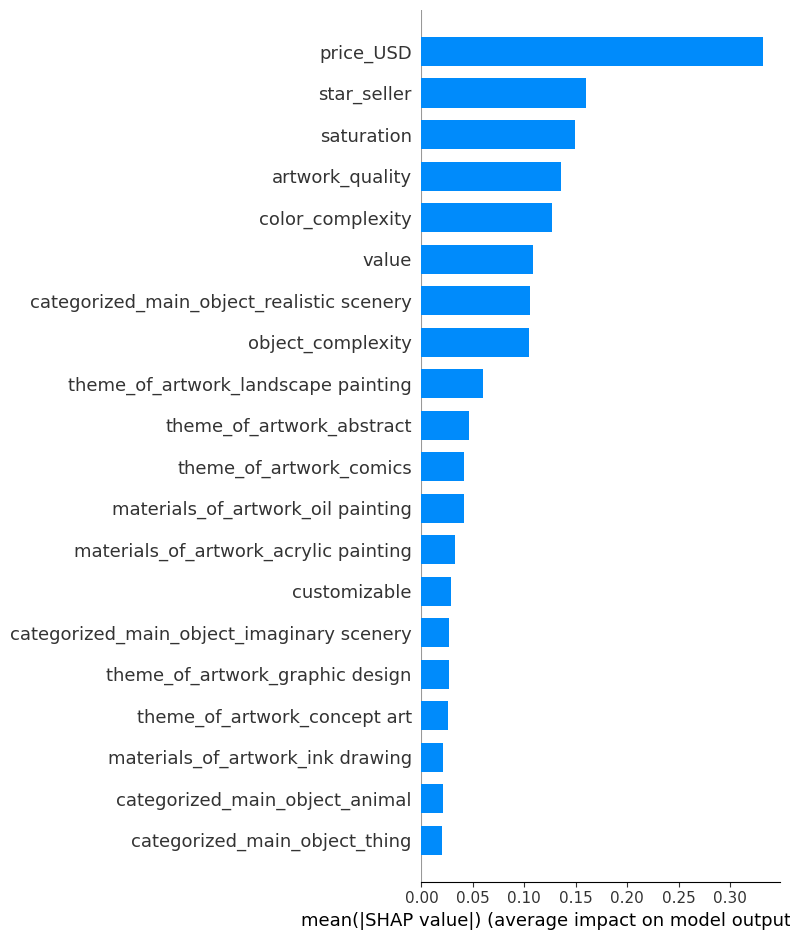

In [54]:
# SHAP summary plot
shap.summary_plot(shap_values, F1, feature_names=f1_features, plot_type="bar")

**아래 시각화 설명**

**SHAP Summary Plot**
- 요약 플롯은 각 특성(feature)의 중요도를 보여줌
- 각 점은 한 데이터 포인트의 SHAP 값을 나타내며, 색상은 해당 특성의 값이 높은지 낮은지를 나타냄
- 오른쪽으로 치우친 점들은 해당 특성이 예측값을 증가시키는 방향으로 작용함을 의미하고, 왼쪽으로 치우친 점들은 예측값을 감소시키는 방향으로 작용함을 의미함

**X 축: SHAP 값**
- SHAP 값은 각 특성이 예측에 미치는 영향을 나타냄
- 양의 SHAP 값은 해당 특성이 예측 값을 증가시키는 방향으로 작용함을 의미하고, 음의 SHAP 값은 예측 값을 감소시키는 방향으로 작용함을 의미

**Y 축: 특성**
- 각 특성의 이름이 나열되어 있으며 상위 특성들은 모델 예측에 더 큰 영향을 미치는 특성들임

**색상**
- 색상은 특성 값의 크기를 나타내며 빨간색은 높은 값, 파란색은 낮은 값을 의미

**해석 예시**
- 두번쨰로 큰 영향을 미치는 특성인 star_seller의 경우 star seller 일 때 (빨간점) 예측 값이 증가하는 경향이 있고 star seller가 아닐 때 예측 값을 감소시키는 경향이 있음

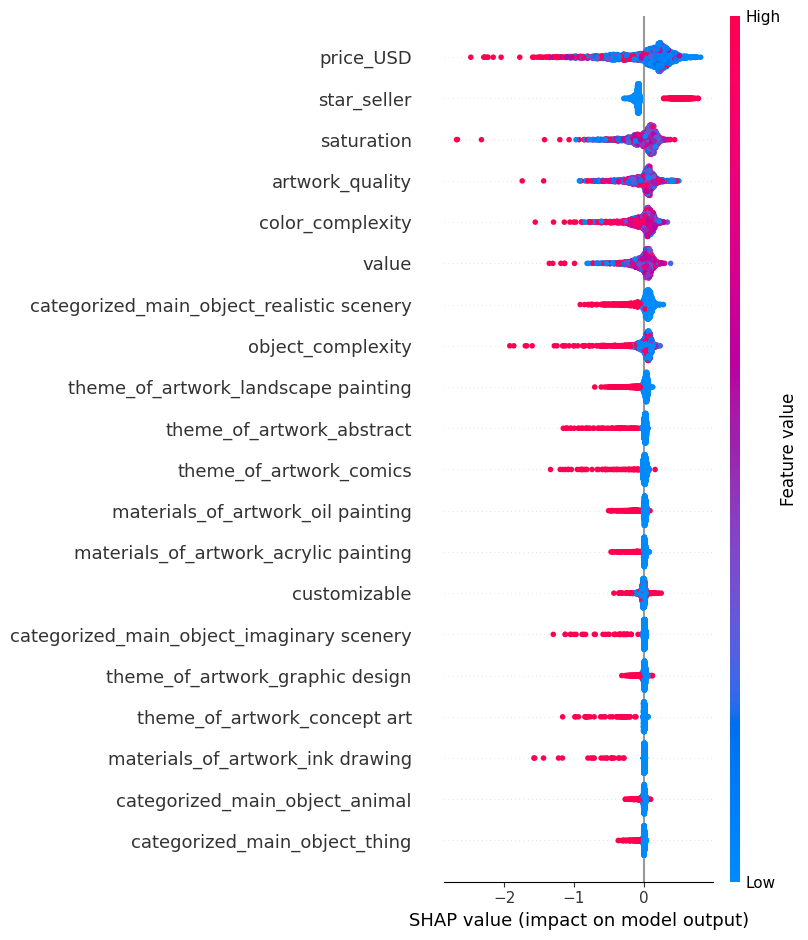

In [55]:
shap.summary_plot(shap_values, F1, feature_names=f1_features)

In [58]:
shap.initjs()

**아래 시각화 설명**

**SHAP Dependence Plot**
- SHAP Dependence Plot은 특정 특성이 모델 예측에 어떻게 영향을 미치는지, 그리고 다른 특성과의 상호작용을 통해 시각적으로 나타냄
- 이 시각화를 통해 모델의 예측이 특정 특성 값에 따라 어떻게 변하는지 쉽게 이해할 수 있음

**X축: star_seller**
- star_seller 특성의 값입니다. 이 값은 각 데이터 포인트의 작품 품질을 나타냅니다.

**Y축: SHAP value for star_seller**
- star_seller 특성의 SHAP 값
- 이 값은 star_seller 특성이 모델 예측에 미치는 영향을 나타냄
- SHAP 값이 양수이면 star_seller가 예측 값을 증가시키고, 음수이면 예측 값을 감소시킴

**색상: price_USD**
- 각 데이터 포인트의 색상은 price_USD 특성 값을 나타냄
- 색상 바는 price_USD 값의 범위를 보여주며 빨간색은 높은 price_USD 값을, 파란색은 낮은 price_USD 값을 의미

**사용법**
- 첫번쨰 인자(현재 star_seller)를 변경하여 확인하고자 하는 특성을 입력
- 기본적으로 입력한 인자와 가장 관련 있는 특성을 interaction_index(현재 price_USD)로 보여주나
확인하고자 하는 특성이 있으면 interaction_index에 입력하여 확인

**해석 예시**
- star_seller(x값)가 높으면 SHAP value(y값)가 증가하는 경향이 있음
- star_seller와 price_USD 간의 관계를 현재 시각화에서 한눈에 확인하기는 어려움

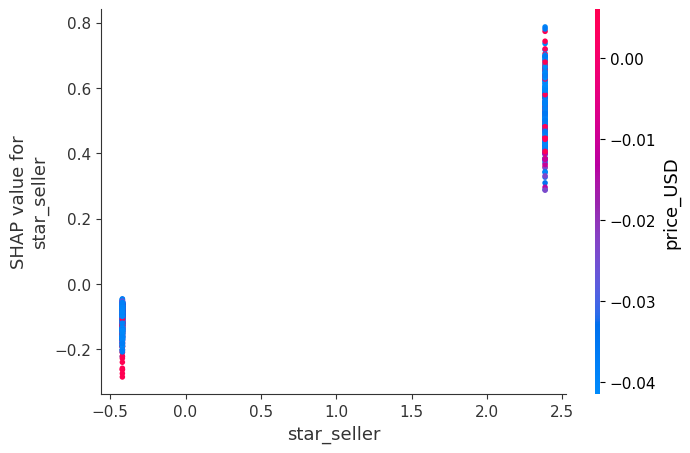

In [77]:
shap.dependence_plot(
    "star_seller",
    shap_values,
    F1,
    feature_names=f1_features,
    # interaction_index="saturation",
)

**아래 시각화 설명**

**SHAP Waterfall Plot**
- 개별 데이터 포인트에 대해 각 특성이 모델 예측에 미치는 영향을 시각적으로 나타냄

**X축: 특성 값**
- X축은 각 특성 값이 예측 값에 미치는 기여도를 나타냄
- 기여도가 양수이면 해당 특성이 예측 값을 증가시키고, 음수이면 예측 값을 감소시킴

**Y축: 특성 이름 및 값**
- Y축은 각 특성의 이름과 값
- 예를 들어, 2.386 = star_seller는 star_seller 특성의 값이 2.386임을 나타냄

**색상: 특성의 기여도**
- 색상은 특성의 기여도를 나타내며 빨간색은 예측 값을 증가시키는 특성을, 파란색은 예측 값을 감소시키는 특성을 의미

**사용법**
- i를 변경하여 원하는 개별 데이터 포인트의 index를 지정하고 결과 확인

**해석 예시**
- star_seller 특성이 2.386일 때 예측 값을 +0.42 증가시키는 데에 기여
- object_complexity 특성이 -0.299일 때 예측 값을 -0.12 감소시키는 데에 기여

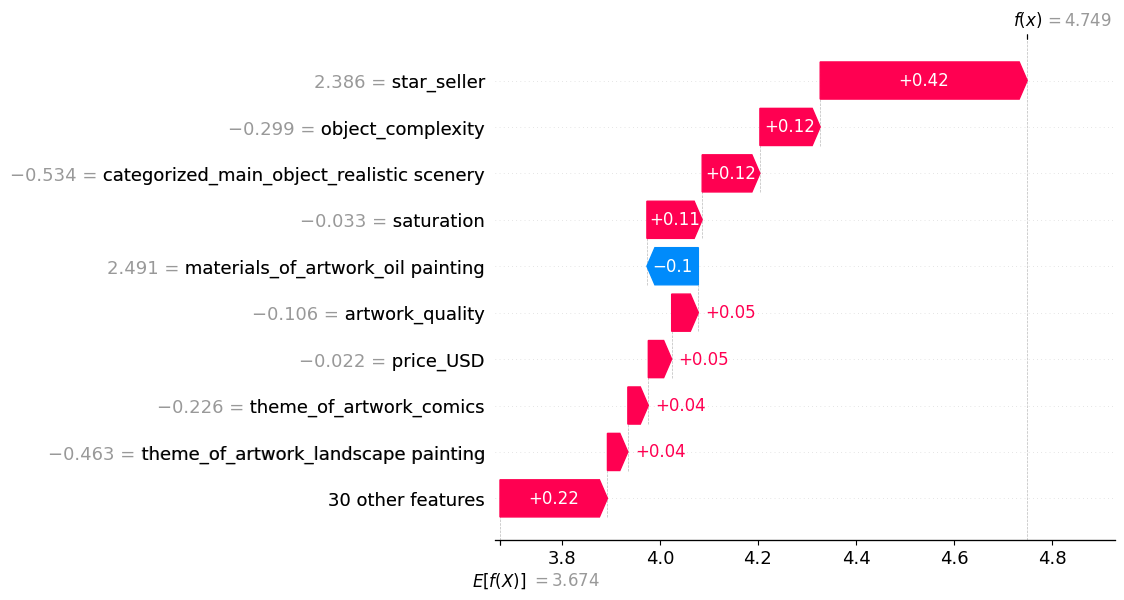

In [74]:
# SHAP Waterfall Plot
i = 0

explanation = shap.Explanation(
    values=shap_values[i],
    base_values=explainer.expected_value,
    data=F1[i],
    feature_names=f1_features,
)
shap.waterfall_plot(explanation)